# Bonusleistung Paket 2
## Übung 4

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Daten einlesen und bereinigen

In [92]:
# Prepocessing package importieren
from sklearn import preprocessing 

# CSV Datei einlesen
df = pd.read_csv('heart_study_dataset_3_neu.csv')
df

,female,age,educational background,Smoker,cigsPerDay,BPMeds,hadStroke,hadHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RiskHeartAttack
0,0,58,Abitur,yes,5.0,0.000000,0,0,0,215.0,170.0,86.0,29.06,75.0,98.000000,0
1,1,60,Ausbildung,no,0.0,0.000000,0,0,0,240.0,137.0,84.0,29.51,82.0,88.000000,0
2,0,38,Abitur,no,0.0,0.000000,0,0,0,171.0,111.0,68.0,18.76,90.0,83.000000,0
3,1,53,Master,yes,30.0,0.000000,0,0,0,189.0,110.0,67.5,23.59,60.0,63.000000,0
4,1,52,Abitur,yes,15.0,0.000000,0,0,0,240.0,94.0,66.5,22.93,70.0,88.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,0,48,Abitur,yes,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4038,0,44,Ausbildung,yes,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4039,0,52,Abitur,no,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4040,1,40,Bachelor,no,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


Da die Daten bereits in einem guten Zustand vorliegen, also keine Null-Werte, keine falschen Werte und kaum bzw. keine großen Ausreißer vorliegen, wurde auf eine Bereinigung der Daten verzichtet

In [93]:
df.describe()

,female,age,cigsPerDay,BPMeds,hadStroke,hadHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RiskHeartAttack
count,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000
mean,0.430975,49.581395,8.989154,0.029560,0.006185,0.309005,0.025730,236.623349,132.318407,82.913657,25.782035,75.905462,81.998086,0.149184
std,0.495274,8.558368,11.861294,0.168338,0.078411,0.462141,0.158348,44.452553,22.018196,11.917345,4.039081,12.063593,22.926458,0.356313
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,143.500000,90.000000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [94]:
dfPrepared.isnull().sum()

female                    0
age                       0
educational background    0
Smoker                    0
cigsPerDay                0
BPMeds                    0
hadStroke                 0
hadHyp                    0
diabetes                  0
totChol                   0
sysBP                     0
diaBP                     0
BMI                       0
heartRate                 0
glucose                   0
RiskHeartAttack           0
dtype: int64

In [113]:
# Komplettes Dataframe wird in ein neues (dfPrepared) kopiert
dfPrepared = df.copy()

# Erste 5 Zeilen des Dataframes werden ausgegeben
dfPrepared.head()

,female,age,educational background,Smoker,cigsPerDay,BPMeds,hadStroke,hadHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RiskHeartAttack
0,0,58,Abitur,yes,5.0,0.0,0,0,0,215.0,170.0,86.0,29.06,75.0,98.0,0
1,1,60,Ausbildung,no,0.0,0.0,0,0,0,240.0,137.0,84.0,29.51,82.0,88.0,0
2,0,38,Abitur,no,0.0,0.0,0,0,0,171.0,111.0,68.0,18.76,90.0,83.0,0
3,1,53,Master,yes,30.0,0.0,0,0,0,189.0,110.0,67.5,23.59,60.0,63.0,0
4,1,52,Abitur,yes,15.0,0.0,0,0,0,240.0,94.0,66.5,22.93,70.0,88.0,0


## One-Hot-Encoding & Normalisierung
Binärkodierung für die Spalten "educational background" und "Smoker"

In [114]:
dfTrans = dfPrepared.copy()
dfTrans = pd.get_dummies(dfPrepared, prefix = '', prefix_sep = '')
dfTrans

,female,age,cigsPerDay,BPMeds,hadStroke,hadHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RiskHeartAttack,Abitur,Ausbildung,Bachelor,Master,no,yes
0,0,58,5.0,0.000000,0,0,0,215.0,170.0,86.0,29.06,75.0,98.000000,0,1,0,0,0,0,1
1,1,60,0.0,0.000000,0,0,0,240.0,137.0,84.0,29.51,82.0,88.000000,0,0,1,0,0,1,0
2,0,38,0.0,0.000000,0,0,0,171.0,111.0,68.0,18.76,90.0,83.000000,0,1,0,0,0,1,0
3,1,53,30.0,0.000000,0,0,0,189.0,110.0,67.5,23.59,60.0,63.000000,0,0,0,0,1,0,1
4,1,52,15.0,0.000000,0,0,0,240.0,94.0,66.5,22.93,70.0,88.000000,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,0,48,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0,1,0,0,0,0,1
4038,0,44,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0,0,1,0,0,0,1
4039,0,52,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0,1,0,0,0,1,0
4040,1,40,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0,0,0,1,0,1,0


Korrelationen ausgeben:

In [115]:
dfTrans.corr()

,female,age,cigsPerDay,BPMeds,hadStroke,hadHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RiskHeartAttack,Abitur,Ausbildung,Bachelor,Master,no,yes
female,1.000000,-0.021122,0.317743,-0.050780,-0.004934,0.009420,0.019496,-0.070093,-0.029232,0.063158,0.087329,-0.122491,0.010183,0.091319,-0.043520,0.044001,-0.093334,0.105713,-0.199625,0.199625
age,-0.021122,1.000000,-0.188131,0.132472,0.059173,0.312700,0.099799,0.262890,0.391617,0.206875,0.133016,-0.007873,0.115721,0.227497,-0.161353,0.220861,-0.041726,-0.055943,0.210170,-0.210170
cigsPerDay,0.317743,-0.188131,1.000000,-0.044317,-0.033453,-0.063221,-0.036611,-0.023121,-0.082069,-0.052888,-0.083008,0.070858,-0.052040,0.059814,0.041667,-0.018162,-0.036301,0.009086,-0.767384,0.767384
BPMeds,-0.050780,0.132472,-0.044317,1.000000,0.117936,0.259889,0.046279,0.076583,0.255811,0.193599,0.104451,0.016472,0.045012,0.088585,0.008931,0.013653,-0.025077,-0.005120,0.048242,-0.048242
hadStroke,-0.004934,0.059173,-0.033453,0.117936,1.000000,0.076996,0.007110,0.000243,0.058558,0.046121,0.026028,-0.018218,0.018310,0.064396,-0.007070,0.031510,-0.009191,-0.027888,0.033738,-0.033738
hadHyp,0.009420,0.312700,-0.063221,0.259889,0.076996,1.000000,0.077315,0.164722,0.696337,0.613272,0.296038,0.149096,0.077133,0.178338,-0.029815,0.084445,-0.055997,-0.021713,0.100423,-0.100423
diabetes,0.019496,0.099799,-0.036611,0.046279,0.007110,0.077315,1.000000,0.041480,0.106919,0.048452,0.089416,0.044671,0.604083,0.103004,-0.025000,0.047713,-0.016734,-0.017666,0.044871,-0.044871
totChol,-0.070093,0.262890,-0.023121,0.076583,0.000243,0.164722,0.041480,1.000000,0.210685,0.167347,0.115005,0.096344,0.047884,0.075676,-0.011085,0.022185,0.000097,-0.018277,0.043957,-0.043957
sysBP,-0.029232,0.391617,-0.082069,0.255811,0.058558,0.696337,0.106919,0.210685,1.000000,0.784056,0.323246,0.186531,0.127998,0.218795,-0.039646,0.126851,-0.065157,-0.062546,0.122838,-0.122838
diaBP,0.063158,0.206875,-0.052888,0.193599,0.046121,0.613272,0.048452,0.167347,0.784056,1.000000,0.374209,0.182940,0.056465,0.143920,-0.021983,0.067784,-0.049354,-0.015146,0.102456,-0.102456


Da es doch viele Spalten sind habe ich für eine bessere Übersicht den Betrag aller Korrelationen absteigend nach ihrer Größe sortiert, um alle Merkmale, die zu 100% miteinander korrelieren zu identifizieren.

In [116]:
corr = dfTrans.corr().abs()
s = corr.unstack()
so = s.sort_values(kind="quicksort")

so.iloc[::-1].head(25)

yes              yes                1.000000
diaBP            diaBP              1.000000
Bachelor         Bachelor           1.000000
Ausbildung       Ausbildung         1.000000
Abitur           Abitur             1.000000
RiskHeartAttack  RiskHeartAttack    1.000000
glucose          glucose            1.000000
heartRate        heartRate          1.000000
BMI              BMI                1.000000
sysBP            sysBP              1.000000
no               no                 1.000000
totChol          totChol            1.000000
diabetes         diabetes           1.000000
hadHyp           hadHyp             1.000000
hadStroke        hadStroke          1.000000
BPMeds           BPMeds             1.000000
cigsPerDay       cigsPerDay         1.000000
age              age                1.000000
Master           Master             1.000000
female           female             1.000000
no               yes                1.000000
yes              no                 1.000000
sysBP     

<AxesSubplot:>

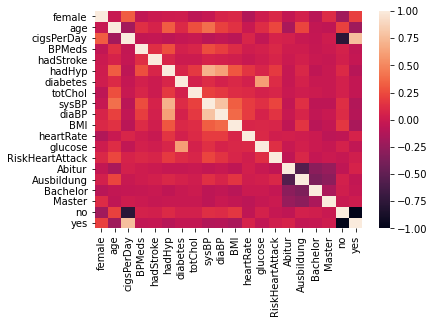

In [99]:
import seaborn as sns

sns.heatmap(dfTrans.corr())

Entsprechende Spalten mit 100%iger Korrelation entfernen.

In [100]:
dfTrans.drop(columns=['no'], inplace=True)
dfTrans

,female,age,cigsPerDay,BPMeds,hadStroke,hadHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,RiskHeartAttack,Abitur,Ausbildung,Bachelor,Master,yes
0,0,58,5.0,0.000000,0,0,0,215.0,170.0,86.0,29.06,75.0,98.000000,0,1,0,0,0,1
1,1,60,0.0,0.000000,0,0,0,240.0,137.0,84.0,29.51,82.0,88.000000,0,0,1,0,0,0
2,0,38,0.0,0.000000,0,0,0,171.0,111.0,68.0,18.76,90.0,83.000000,0,1,0,0,0,0
3,1,53,30.0,0.000000,0,0,0,189.0,110.0,67.5,23.59,60.0,63.000000,0,0,0,0,1,1
4,1,52,15.0,0.000000,0,0,0,240.0,94.0,66.5,22.93,70.0,88.000000,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,0,48,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0,1,0,0,0,1
4038,0,44,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0,0,1,0,0,1
4039,0,52,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0,1,0,0,0,0
4040,1,40,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0,0,0,1,0,0


Normalisierung aller nicht-binären Attribute mit minmax scaler.

In [101]:
from sklearn.preprocessing import minmax_scale
# Komplettes Dataframe wird in ein neues (dfnorm) kopiert
dfnorm = dfTrans.copy()

# Transformiert die Werte, indem jeder Wert auf einen bestimmten Bereich skaliert wird. 
# Jedes Merkmal wird einzeln skaliert, so dass es im gegebenen Bereich des Datensatzes liegt, d. h. zwischen null und eins. 
scaled = minmax_scale(dfnorm[['cigsPerDay','BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']], feature_range = (0, 1))

# In dem mehrdimensionalen Array scaled befinden sich jeweils das Ergebnis für die Attribute in einem Array
# Diese werden jeweils auf die Spalten aufgeteilt (1. Wert im Array=cigsPerDay, 2. Wert im Array=BPMeds und so weiter)
dfnorm['cigsPerDay'] = scaled[:,0] 
dfnorm['BPMeds'] = scaled[:,1]
dfnorm['totChol'] = scaled[:,2]
dfnorm['sysBP'] = scaled[:,3]
dfnorm['diaBP'] = scaled[:,4]
dfnorm['BMI'] = scaled[:,5]
dfnorm['heartRate'] = scaled[:,6]
dfnorm['glucose'] = scaled[:,7]

# Erste 5 Werte von den transformierten Spalten ausgeben
dfnorm[['cigsPerDay','BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].head()

,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0.071429,0.0,0.183362,0.408983,0.402116,0.327678,0.313131,0.163842
1,0.000000,0.0,0.225806,0.252955,0.380952,0.338585,0.383838,0.135593
2,0.000000,0.0,0.108659,0.130024,0.211640,0.078042,0.464646,0.121469
3,0.428571,0.0,0.139219,0.125296,0.206349,0.195104,0.161616,0.064972
4,0.214286,0.0,0.225806,0.049645,0.195767,0.179108,0.262626,0.135593


## Training & Bewertung der Modelle

Zielvariable extrahieren und Daten auf 70% Trainingsdaten und 30% Testdaten aufsplitten und darauf kNN und SVM trainieren und testen. 

In [102]:
from sklearn.model_selection import train_test_split

x = dfnorm.drop(['RiskHeartAttack'], axis = 1)
y = dfnorm['RiskHeartAttack'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                    random_state = 101, stratify = y, test_size = 0.3)

### k-Nearest Neighbours (kNN)

In [119]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 23)
neigh.fit(x_train, y_train)
y_pred_knn = neigh.predict(x_test)

In [120]:
neigh.kneighbors(x_test, 2, return_distance=False )

array([[2521, 1235],
       [2066, 1271],
       [ 899, 2550],
       ...,
       [2782, 1566],
       [1921, 1138],
       [2786, 1395]])

#### Modellbewertung
Verwenden Sie danach den Scorer oder andere behandelte Methoden, um die Confusion Matrix und die Accuracy Ihrer Modelle zu bewerten.

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1032
           1       0.29      0.01      0.02       181

    accuracy                           0.85      1213
   macro avg       0.57      0.50      0.47      1213
weighted avg       0.77      0.85      0.78      1213



In [122]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_knn))

[[1027    5]
 [ 179    2]]


### Support Vector Machine

In [123]:
from sklearn.svm import SVC

svm_model = SVC(kernel = 'rbf', gamma = 'scale', random_state = 1)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

#### Modellbewertung
Verwenden Sie danach den Scorer oder andere behandelte Methoden, um die Confusion Matrix und die Accuracy Ihrer Modelle zu bewerten.

In [124]:
print(classification_report(y_test, y_pred_svm, zero_division = 1))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1032
           1       1.00      0.00      0.00       181

    accuracy                           0.85      1213
   macro avg       0.93      0.50      0.46      1213
weighted avg       0.87      0.85      0.78      1213



In [125]:
print(confusion_matrix(y_test, y_pred_svm))

[[1032    0]
 [ 181    0]]


### Bewertung der beiden Algorithmen

Sehr unausbalanciertes Dataset. Genauigkeit ist bei beiden identisch, aber SVM hat eine höhere Genauigkeit die Klasse 1 zu erkennen, dafür aber einen geringeren recall.

1. Support Vector Machine mit 85%
2. k-Nearest Neighbours mit 85 %

## Optimierung mit GridSearch

In [62]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### SVM

In [126]:
from sklearn.svm import SVC

svm_model = SVC(random_state = 1)
param_grid1 = {"kernel": ["poly", "rbf", "sigmoid"], 
              "gamma": ["scale","auto"] }
gridSearch1 = GridSearchCV(estimator = svm_model, param_grid = param_grid1)
gridSearch1.fit(x_train, y_train)

results1 = pd.DataFrame(gridSearch1.cv_results_)

params1 = results1.loc[results1['rank_test_score'].idxmax()]
params1['params']

{'gamma': 'scale', 'kernel': 'sigmoid'}

Anschließend mit den besten Parametern das Modell trainieren.

In [127]:
svm_model = SVC(kernel = 'sigmoid', gamma = 'scale', random_state = 1)
svm_model.fit(x_train, y_train)
y_pred_svm2 = svm_model.predict(x_test)

In [128]:
print(classification_report(y_test, y_pred_svm2, zero_division = 1))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1032
           1       1.00      0.00      0.00       181

    accuracy                           0.85      1213
   macro avg       0.93      0.50      0.46      1213
weighted avg       0.87      0.85      0.78      1213



### k-Nearest Neighbours

In [129]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

param_grid = {"metric": ["euclidean", "manhattan", "chebyshev", "minkowski"],
            "n_neighbors": [1, 2, 4, 8, 16, 32, 64]
           }

gridSearch = GridSearchCV(estimator = knn_model, param_grid = param_grid)
gridSearch.fit(x_train, y_train)

results = pd.DataFrame(gridSearch.cv_results_)

params = results.loc[results['rank_test_score'].idxmax()]
params['params']

{'metric': 'euclidean', 'n_neighbors': 1}

In [130]:
neigh = KNeighborsClassifier(n_neighbors = 23)
neigh.fit(x_train, y_train)
y_pred_knn2 = neigh.predict(x_test)

In [131]:
print(classification_report(y_test, y_pred_knn2, zero_division = 1))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1032
           1       0.29      0.01      0.02       181

    accuracy                           0.85      1213
   macro avg       0.57      0.50      0.47      1213
weighted avg       0.77      0.85      0.78      1213



## Fazit:

Nachdem ich beide Modelle erfolgreich trainiert habe ist mir in der Bewertung der beiden Modelle aufgefallen, dass das Dataset sehr unausbalanciert ist. Während es von der Klasse 0 (Kein Herzinfarktrisiko) 1032 Datensätze gibt, gibt es zu Klasse 1 (Herzinfarktrisiko) nur 181 Datensätze. Das macht das Trainieren eines Modells natürlich etwas schwerer. Dabei hat mich aber verwundert, dass der SVM Algorithmus trotzdem eine Genauigkeit von 100% erreicht hat.        
    
Außerdem konnte eine Verbesserung mit GridSearch nicht erzielt werden, daher sind die Anfangs gewählten Parameter entweder bereits optimal gewählt oder das Dataset gibt eine bessere Vorhersage mit anderen Parametern einfach nicht her.    
Trotzdem denke ich, dass insgesamt beide Algorithmen auf diesem Dataset ganz gut funktionieren. 

In [70]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006421,0.001051,0.068330,0.035829,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.795053,0.786219,0.768551,0.773852,0.780531,0.780841,0.009283,27
1,0.005189,0.000639,0.050438,0.005285,euclidean,2,"{'metric': 'euclidean', 'n_neighbors': 2}",0.848057,0.842756,0.840989,0.842756,0.835398,0.841991,0.004060,20
2,0.005412,0.000796,0.075285,0.005828,euclidean,4,"{'metric': 'euclidean', 'n_neighbors': 4}",0.855124,0.844523,0.833922,0.840989,0.842478,0.843407,0.006858,17
3,0.006726,0.001872,0.081854,0.012240,euclidean,8,"{'metric': 'euclidean', 'n_neighbors': 8}",0.849823,0.849823,0.840989,0.844523,0.838938,0.844819,0.004459,14
4,0.005524,0.000494,0.065193,0.007660,euclidean,16,"{'metric': 'euclidean', 'n_neighbors': 16}",0.855124,0.851590,0.849823,0.853357,0.847788,0.851536,0.002576,2
5,0.005296,0.000470,0.063442,0.006153,euclidean,32,"{'metric': 'euclidean', 'n_neighbors': 32}",0.851590,0.851590,0.849823,0.848057,0.849558,0.850124,0.001340,10
6,0.005496,0.000431,0.071476,0.004132,euclidean,64,"{'metric': 'euclidean', 'n_neighbors': 64}",0.851590,0.851590,0.849823,0.849823,0.851327,0.850831,0.000828,4
7,0.005624,0.001284,0.074232,0.015380,manhattan,1,"{'metric': 'manhattan', 'n_neighbors': 1}",0.795053,0.786219,0.770318,0.779152,0.775221,0.781193,0.008665,26
8,0.005341,0.001138,0.077019,0.004786,manhattan,2,"{'metric': 'manhattan', 'n_neighbors': 2}",0.849823,0.842756,0.837456,0.844523,0.828319,0.840575,0.007291,23
9,0.006534,0.000741,0.107736,0.019438,manhattan,4,"{'metric': 'manhattan', 'n_neighbors': 4}",0.846290,0.840989,0.833922,0.837456,0.838938,0.839519,0.004097,24
